In [5]:
from network_stats import interpolate_spline_and_get_curvature, interpolate_and_get_curvature
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

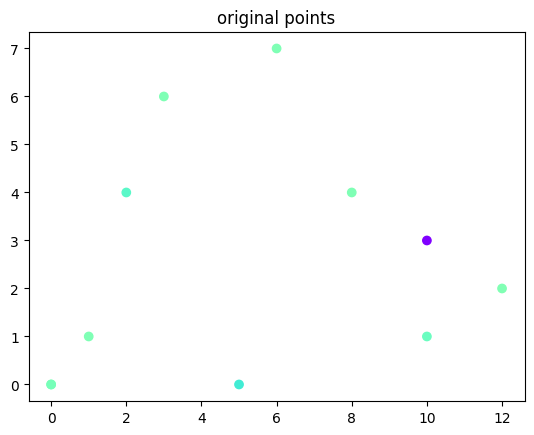

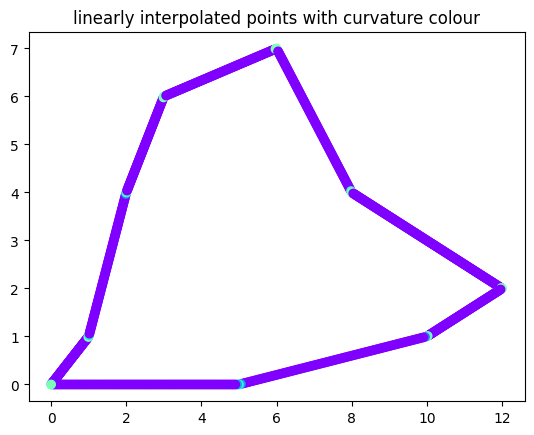

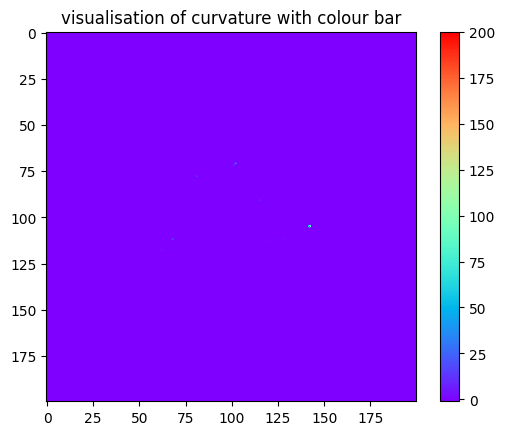

mean curvature: 0.5400009874716402


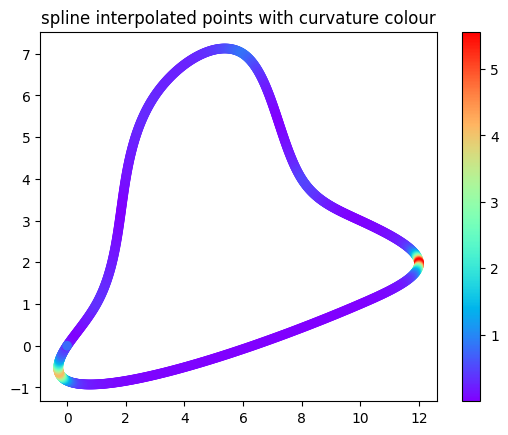

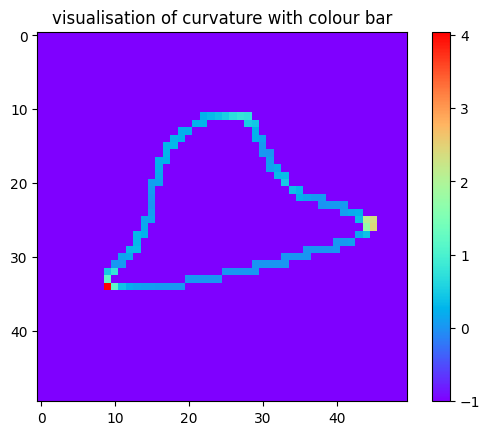

mean curvature: 0.45810456797039206


In [23]:
points = np.array(
    [
        [0, 0],
        [1, 1],
        [2, 4],
        [3, 6],
        [6, 7],
        [8, 4],
        [10, 3],
        [12, 2],
        [10, 1],
        [5, 0],
    ]
).astype(float)

# Add the first coordinate to the end to ensure it loops
looped_points = np.vstack((points, points[0]))

interp_curvatures, curvatures, interpolated_points = interpolate_and_get_curvature(points=looped_points, interpolation_number=100)

scaled_curvatures = 1 / (1 + np.exp(-curvatures))
scaled_curvatures = (scaled_curvatures - np.min(scaled_curvatures)) / np.max(scaled_curvatures)
colours = cm.rainbow(scaled_curvatures)

plt.scatter(looped_points[:, 0], looped_points[:, 1], color=colours)
plt.title("original points")
plt.show()

interp_scaled_curvatures = 1 / (1 + np.exp(-interp_curvatures))
interp_scaled_curvatures = (interp_scaled_curvatures - np.min(interp_scaled_curvatures)) / np.max(interp_scaled_curvatures)
interp_colours = cm.rainbow(interp_scaled_curvatures)

plt.scatter(interpolated_points[:, 0], interpolated_points[:, 1], color=interp_colours)
plt.title("linearly interpolated points with curvature colour")
plt.show()

# Construct a visualisation
curv_img = np.zeros((200, 200)) - 1
scaling_factor = (curv_img.shape[0]*0.8) / np.max(points) / 2
centroid = np.array([np.mean(interpolated_points[:, 0]), np.mean(interpolated_points[:, 1])])
for point, curvature in zip(interpolated_points, interp_curvatures):
    scaled_point = ((np.array(curv_img.shape) / 2) + (point * scaling_factor) - centroid*scaling_factor).astype(int)
    curv_img[scaled_point[0], scaled_point[1]] = curvature

plt.imshow(np.flipud(curv_img.T), cmap="rainbow")
plt.colorbar()
plt.title("visualisation of curvature with colour bar")
plt.show()

print(f"mean curvature: {np.mean(interp_curvatures)}")

#  --------- SPLINE INTERPOLATION -----------
interp_curvatures, interpolated_points = interpolate_spline_and_get_curvature(points=points, interpolation_number=100)

# interp_scaled_curvatures = 1 / (1 + np.exp(-interp_curvatures))
# interp_scaled_curvatures = (interp_scaled_curvatures - np.min(interp_scaled_curvatures)) / np.max(interp_scaled_curvatures)
# interp_colours = cm.rainbow(interp_curvatures)

# Plot the points
scatter_plot = plt.scatter(interpolated_points[:, 0], interpolated_points[:, 1], c=interp_curvatures, cmap="rainbow")
plt.title("spline interpolated points with curvature colour")
plt.colorbar(scatter_plot)
plt.show()

# Construct a visualisation
curv_img = np.zeros((50, 50)) - 1
scaling_factor = (curv_img.shape[0]*1.4) / np.max(points) / 2
centroid = np.array([np.mean(interpolated_points[:, 0]), np.mean(interpolated_points[:, 1])])
for point, curvature in zip(interpolated_points, interp_curvatures):
    scaled_point = ((np.array(curv_img.shape) / 2) + (point * scaling_factor) - centroid*scaling_factor).astype(int)
    curv_img[scaled_point[0], scaled_point[1]] = curvature

plt.imshow(np.flipud(curv_img.T), cmap="rainbow")
plt.colorbar()
plt.title("visualisation of curvature with colour bar")
plt.show()

print(f"mean curvature: {np.mean(interp_curvatures)}")


